# <font color = red><div align = center>PROJECT : Classification des commentaires (Démocratie participative)

# Problématique

* Preprocess de type NLP puis création d'un modele de deeplerning de base afin de classifier les différentes observations d'un projet en fonction de leur valence affective (observation désagréable, observation neutre, observation agréable)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
pd.set_option('display.max_info_rows', 500)

Cette partie montre le code pour importer les librairies :
- numpy (pour les outils mathématiques) 
- pandas (pour la manipulation des dataframes sur python).

# 1/ Get data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Projet Lucas Malt/DATA_EP20285.xlsx')

In [ ]:
df.head()

,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
0,1,Quand on voit l'aménagement du pont de Bellevu...,Formulaire,21/08/2020,08:54,NaN,NaN,False,3 / 10,Plutôt défavorable au projet
1,2,Je suis complètement pour ce projet. Il est né...,Formulaire,21/08/2020,12:11,44300.0,NANTES,False,3 / 10,Plutôt favorable au projet
2,3,"Bonjour,\n\nBien noté la déconstruction du PS3...",Formulaire,21/08/2020,14:59,NaN,NaN,False,3 / 10,Plutôt favorable au projet
3,4,"Bonjour,\n\nJe suis tout a fait pour ce projet...",Formulaire,21/08/2020,17:23,NaN,NaN,False,4 / 10,Plutôt favorable au projet
4,5,"Bonjour, je suis tout à fait partisan du proje...",Formulaire,22/08/2020,22:40,44240.0,LA CHAPELLE SUR ERDRE,False,5 / 10,Plutôt favorable au projet


Importation du dataset à partir du google drive (dossier '/content/drive') puis analyse des 5 premières lignes du dataset.

# 2/ Simple stat Observation

Dans cette partie, je m'occupe de faire quelques observations (le nombre de ligne et de colonne) puis des analyses statistiques (le type de données pour chaque colonne).

In [ ]:
print("Number of rows : {} and number of columns is : {}".format(df.shape[0],df.shape[1]))
print()
print('--------------------------------------------------------------------')
print("Display of dataset: ")
display(df.head())
print()
print('--------------------------------------------------------------------')
print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()
print('--------------------------------------------------------------------')
print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

Number of rows : 339 and number of columns is : 10

--------------------------------------------------------------------
Display of dataset: 


,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
0,1,Quand on voit l'aménagement du pont de Bellevu...,Formulaire,21/08/2020,08:54,NaN,NaN,False,3 / 10,Plutôt défavorable au projet
1,2,Je suis complètement pour ce projet. Il est né...,Formulaire,21/08/2020,12:11,44300.0,NANTES,False,3 / 10,Plutôt favorable au projet
2,3,"Bonjour,\n\nBien noté la déconstruction du PS3...",Formulaire,21/08/2020,14:59,NaN,NaN,False,3 / 10,Plutôt favorable au projet
3,4,"Bonjour,\n\nJe suis tout a fait pour ce projet...",Formulaire,21/08/2020,17:23,NaN,NaN,False,4 / 10,Plutôt favorable au projet
4,5,"Bonjour, je suis tout à fait partisan du proje...",Formulaire,22/08/2020,22:40,44240.0,LA CHAPELLE SUR ERDRE,False,5 / 10,Plutôt favorable au projet



--------------------------------------------------------------------
Basics statistics: 


,Numéro,Observation,Mode de dépôt,Date de dépôt,Heure de dépôt,Code postal,Ville,Modéré,Qualité,Teneur
count,339.000000,339,339,339,339,285.000000,224,339,324,325
unique,NaN,313,2,37,261,NaN,24,1,9,3
top,NaN,voir observation du registre en pièce jointe,Formulaire,26/09/2020,16:21,NaN,NANTES,False,5 / 10,Neutre
freq,NaN,10,278,80,6,NaN,119,339,144,220
mean,170.000000,NaN,NaN,NaN,NaN,34996.652632,NaN,NaN,NaN,NaN
std,98.005102,NaN,NaN,NaN,NaN,18473.424554,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,85.500000,NaN,NaN,NaN,NaN,44104.000000,NaN,NaN,NaN,NaN
50%,170.000000,NaN,NaN,NaN,NaN,44240.000000,NaN,NaN,NaN,NaN
75%,254.500000,NaN,NaN,NaN,NaN,44300.000000,NaN,NaN,NaN,NaN



--------------------------------------------------------------------
Percentage of missing values: 


Numéro             0.000000
Observation        0.000000
Mode de dépôt      0.000000
Date de dépôt      0.000000
Heure de dépôt     0.000000
Code postal       15.929204
Ville             33.923304
Modéré             0.000000
Qualité            4.424779
Teneur             4.129794
dtype: float64

In [ ]:
df.Teneur.value_counts()

Neutre                          220
Plutôt favorable au projet       76
Plutôt défavorable au projet     29
Name: Teneur, dtype: int64

La teneur correspond à l'avis de la personne sur la réalisation du projet. Nous avons 220 commentaires d'avis "neutres" à la réalisation du projet, 76 commentaires qui y sont favorables et 29 commentaires défavorables.

In [ ]:
df.dtypes

Numéro              int64
Observation        object
Mode de dépôt      object
Date de dépôt      object
Heure de dépôt     object
Code postal       float64
Ville              object
Modéré               bool
Qualité            object
Teneur             object
dtype: object

Dans cette partie, nous avons le type de données pour chaque colonne. De type "int64" lorsqu'il s'agit de nombre entier, "object" lorsqu'il s'agit de phrases ou de mots, "float64" lorsque les données sont des décimaux et "bool" quand c'est de type "Vrai/faux".

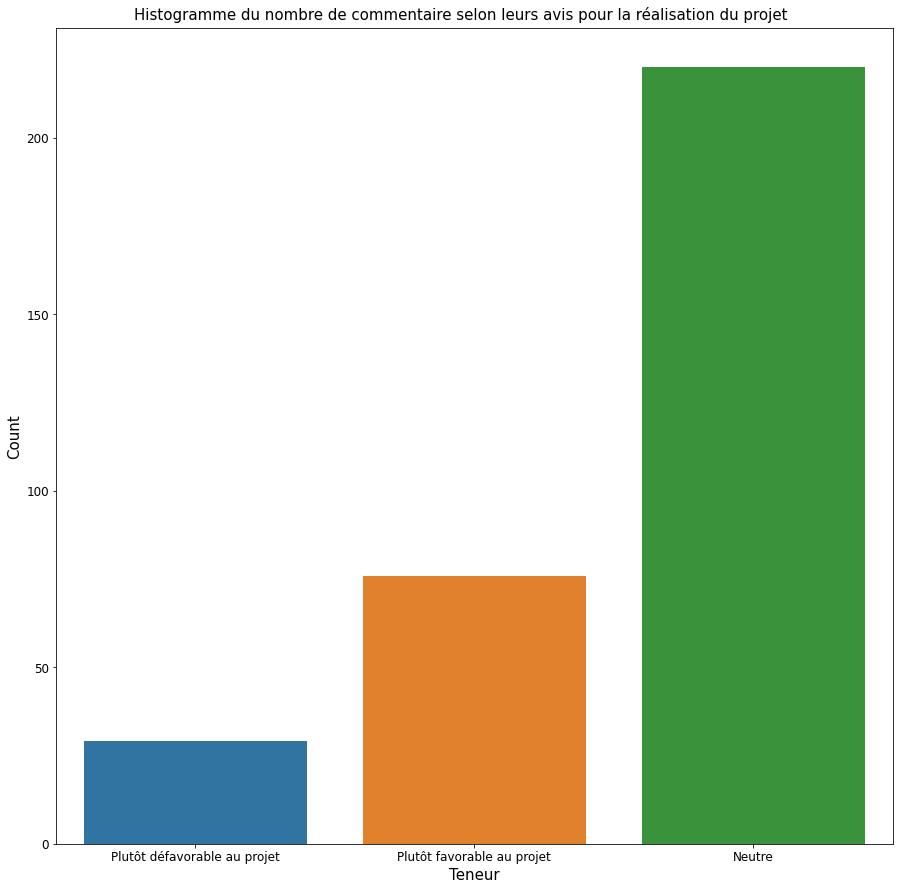

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15, 15))
sns.countplot(x = df.Teneur, data = df)
fig.suptitle("Histogramme du nombre de commentaire selon leurs avis pour la réalisation du projet", fontsize = 15, y = 0.90)
plt.xticks(fontsize = 12)
plt.xlabel("Teneur", fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylabel("Count", fontsize = 15)
plt.show;

Je donne ici une visualisation de la répartition des avis. Nous voyons bien que la majorité des avis sont plutôt "Neutre" par rapport à favorable ou défavorable.

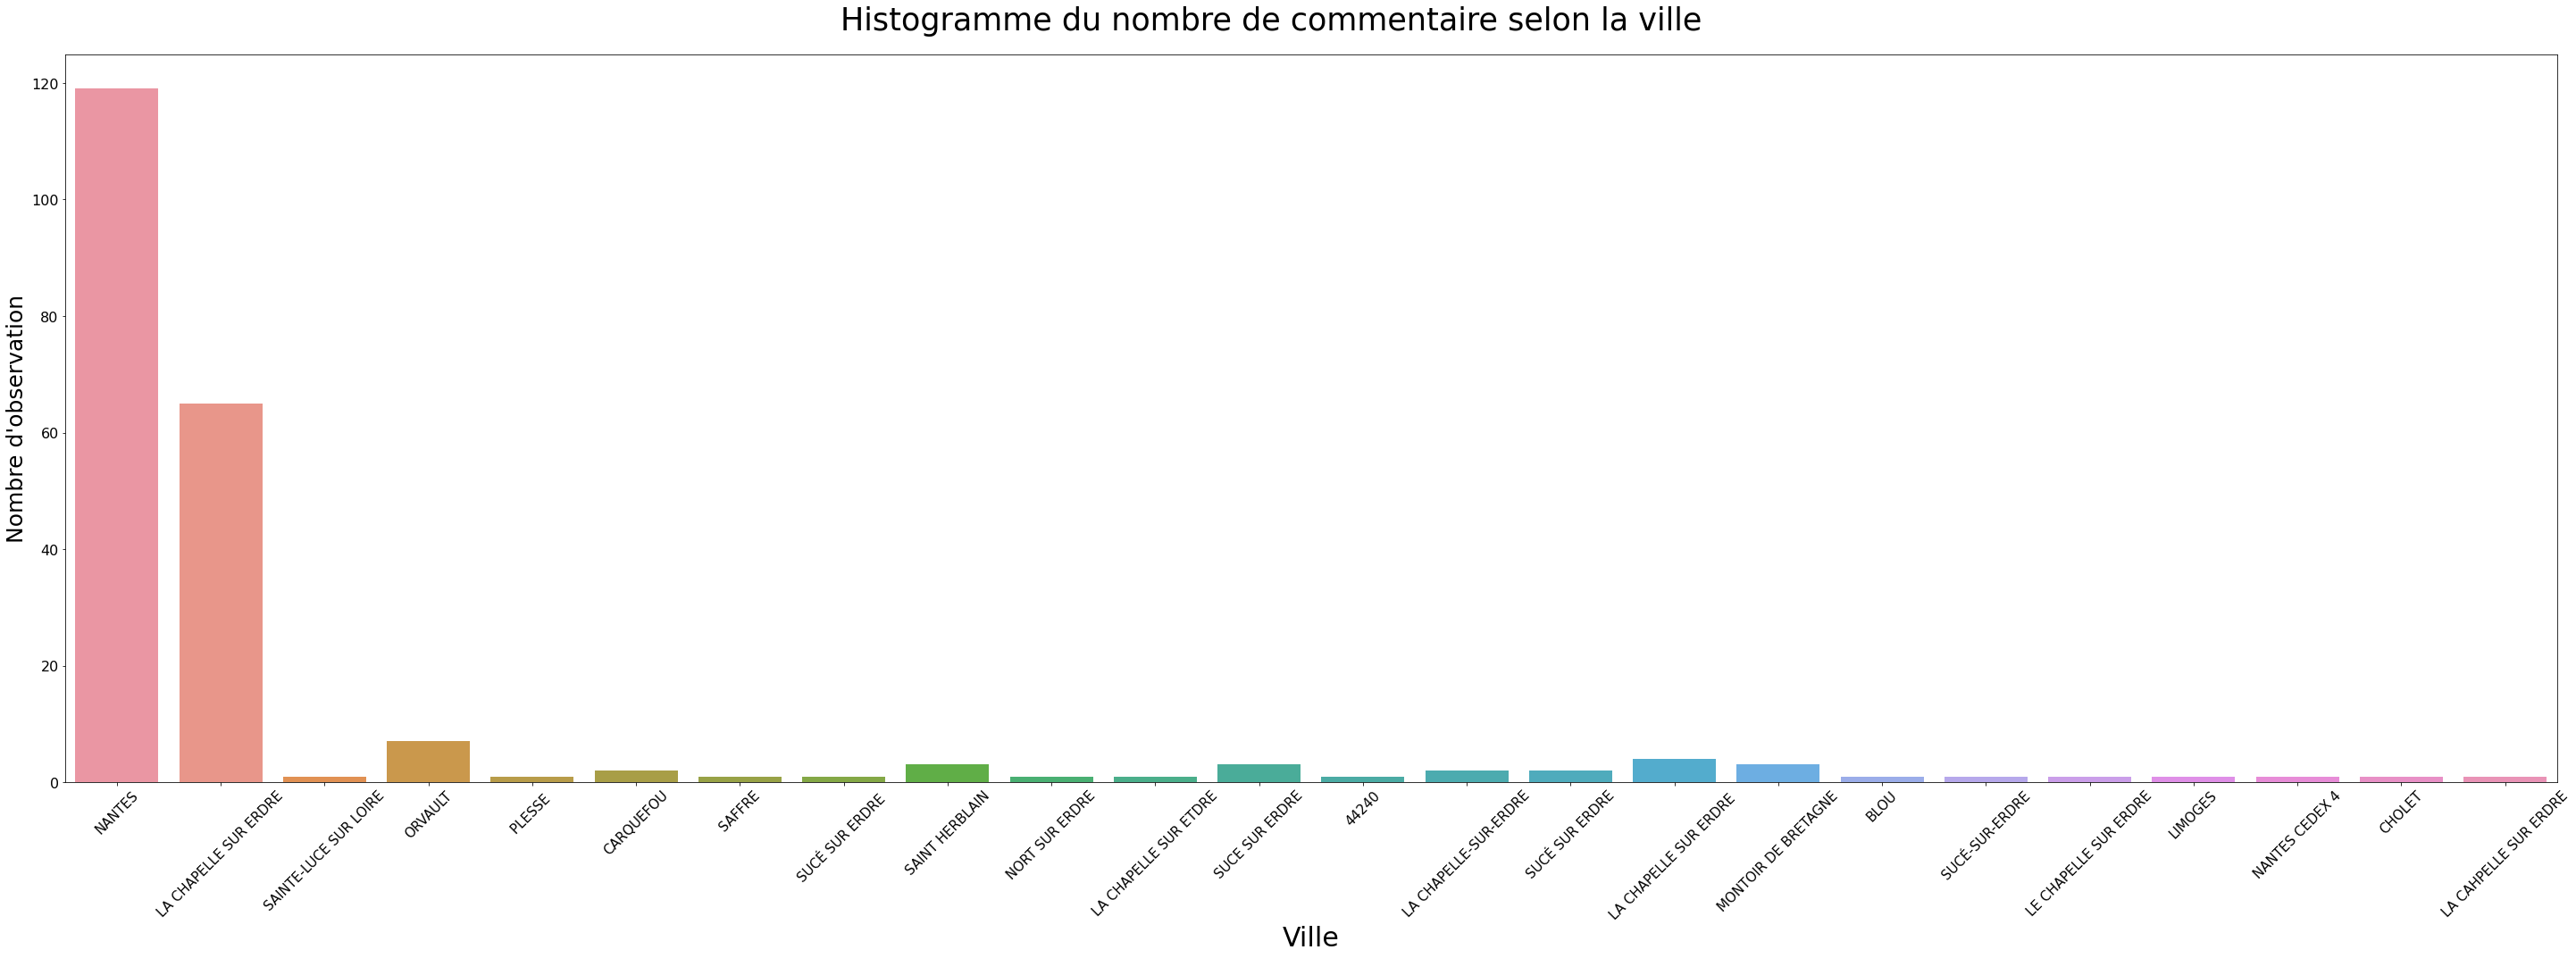

In [ ]:
fig, ax = plt.subplots(figsize = (50, 15))
sns.countplot(x = df.Ville, data = df)
fig.suptitle("Histogramme du nombre de commentaire selon la ville", fontsize = 35, y = 0.93)
plt.xticks(fontsize = 15, rotation = 45)
plt.xlabel("Ville", fontsize = 30, y=0.8)
plt.yticks(fontsize = 16)
plt.ylabel("Nombre d'observation", fontsize = 25)
plt.show;

Dans cette enquête, les commentaires viennent principalement de la ville de Nantes, selon les données issues de la colonne "Observation", suivi de La chapelle sur Erdre. En revanche, l'analyse n'est pas effectuée sur toutes les données, car certaines observations ont pour valeurs des NaN.

# 3/ Starting to preprocess for a deeplearning model

Avant de pouvoir entraîner notre modèle à la prédiction des teneurs selon les commentaires, j'effectue ici une étape de préprocessing. Cette étape très importante consiste à simplifier au maximum les commentaires afin de diminuer leurs diversités et enlever les mots ou les commentaires n'ayant pas d'impact.

In [ ]:
df2 = pd.DataFrame(df.loc[:,"Observation"], columns =['Observation'])

In [ ]:
df2

,Observation
0,Quand on voit l'aménagement du pont de Bellevu...
1,Je suis complètement pour ce projet. Il est né...
2,"Bonjour,\n\nBien noté la déconstruction du PS3..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet..."
4,"Bonjour, je suis tout à fait partisan du proje..."
...,...
334,"\nBonjour,\nHabitants Gesvrine, nous craignons..."
335,"Contribution des élus LCEA\n\nBonjour,\n\nci-j..."
336,voir observation du registre en pièce jointe
337,"Bonjour,\nJe n'ai rien contre aménagement de l..."


Ici, je récupère uniquement les avis pour l'étape de préprocessing.

In [ ]:
df2.iloc[4, 0]

'Bonjour, je suis tout à fait partisan du projet qui va dans le bon sens, pour l utiliser tous les jours . Ceci dit ,  Je trouve juste dommage que le projet n aille pas jusqu’à la porte de rennes en 2x3 voies. En effet nous avons un traffic sur 2 vois venant de l autoroute, un autre de 2 voies venant du périphérique. Cela font 4 voies qui se regroupe sur 2 voies jusqu’à la prochaine sortie de la route de rennes.  Ne pensez-vous pas retrouver l engorgement habituel après la porte de gesvre. \nAinsi le périphérique serait en 2x3 voies de la Porte-de-Gesvres à la porte D Orvault permettant aux usagers venant de l autoroute de ne pas être perturbé par un flux du périphérique. '

In [ ]:
df2['clean_documents'] = df2.Observation.apply(lambda x: x.replace("\n", " "))
df2['clean_documents+'] = df2['clean_documents'].fillna('').apply(lambda x: x.lower().strip())

df2.head()

,Observation,clean_documents,clean_documents+
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit l'aménagement du pont de Bellevu...,quand on voit l'aménagement du pont de bellevu...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q..."
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje..."


J'enlève les /n (qui sont des sauts de lignes) et les espaces au début et à la fin des commentaires puis je met tous les commentaires en minuscule (**bonjour** et **Bonjour** sont 2 mots différents pour python).

In [ ]:
df2.iloc[184, 2]

'** bus tan ligne 96 **  durant les travaux, malgré la fermeture du pont ps03, il est fondamental de maintenir pour les habitants du hameau de l’angle chaillou l’accès aux services publics : mairie de quartier, établissements scolaires et d’enseignement supérieur, transports en commun, bibliothèques, équipements sportifs, maison des associations, ainsi qu’aux commerces et associations.  nous demandons que tous les arrêts de la ligne 96 de la tan côté nord soient desservis jusqu’à “angle chaillou” durant toute la durée des travaux, en complément d’une passerelle piétons et cyclistes enjambant l’autoroute.  crlm'

Je donne le résultat que j'ai obtenu après le premier traitement. Tous les caractères sont maintenant en minuscule.

In [ ]:
# Import spacy, if you don't have it --> !pip install spacy 
import spacy
spacy.__version__
!python -m spacy download fr_core_news_sm -q
# Import English using en_core_web_sm.load()
import fr_core_news_sm
nlp = fr_core_news_sm.load()

     |████████████████████████████████| 14.7MB 18.6MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
## Import stop words from spacy 
from spacy.lang.fr.stop_words import STOP_WORDS

## Tokenize the cleaned document
tokenized_doc = df2['clean_documents+'].fillna('').apply(lambda x: nlp(x))

# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in STOP_WORDS])
tokenized_doc

0      [voir, aménagement, pont, bellevue, porte, anj...
1      [complètement, projet, ., nécessaire, réaménag...
2      [bonjour, ,,  , noter, déconstruction, ps3, .,...
3      [bonjour, ,,  , projet, indispensable, ., ,, t...
4      [bonjour, ,, partisan, projet, bon, sens, ,, l...
                             ...                        
334    [bonjour, ,, habitant, gesvrine, ,, craindre, ...
335    [contribution, élu, lcea,  , bonjour, ,,  , -,...
336        [voir, observation, registre, pièce, joindre]
337    [bonjour, ,, aménagement, porte, gevre, ., rev...
338    [partager, totalement, point, vue, émettre, ca...
Name: clean_documents+, Length: 339, dtype: object

Ici, j'installe 2 librairies majeurs : 
- **fr_core_news_sm** : Librairie très importante car elle est capable, pour chaque mot, de les lémmatiser. On enlève donc la conjugaison ou la grammaire des mots (ex : était, est ou suis devient être --> On enlève au maximum la diversité des mots car python considère que "ponts" et "pont" sont mathématiquement 2 mots différents, ce qui n'est pas le cas en réalité dans un commentaire).
- **STOP_WORDS** : Librairie qui contient tous les mots les plus courants dans la langue française comme "de", "le", "la"...

j'applique la librairie permettant de lémmatiser mes mots puis je supprime les STOP-WORDS.


In [ ]:
tokenized_doc[184]

['*',
 '*',
 'bus',
 'tan',
 'lign',
 '96',
 '*',
 '*',
 ' ',
 'travail',
 ',',
 'fermeture',
 'pont',
 'ps03',
 ',',
 'fondamental',
 'maintenir',
 'habitant',
 'hameau',
 'angl',
 'chaillou',
 'accès',
 'service',
 'public',
 ':',
 'mairie',
 'quartier',
 ',',
 'établissement',
 'scolaire',
 'enseignement',
 'supérieur',
 ',',
 'transports',
 'commun',
 ',',
 'bibliothèque',
 ',',
 'équipement',
 'sportif',
 ',',
 'maison',
 'association',
 ',',
 'commerce',
 'association',
 '.',
 ' ',
 'demander',
 'arrêt',
 'ligne',
 '96',
 'tan',
 'côté',
 'nord',
 'être',
 'desservir',
 'jusqu’',
 '“',
 'angle',
 'chaillou',
 '”',
 'durée',
 'travail',
 ',',
 'complément',
 'passerelle',
 'piéton',
 'cycliste',
 'enjamber',
 'autoroute',
 '.',
 ' ',
 'crlm']

A ce niveau, nous avons pratiquement tous les mots qui sont lémmatisés. En revanche, il y a encore des caractères présents qui auront un impact sur le modèle (les points, virgules, point-virgules...). Egalement, des lettres et des chiffres uniques ont fait leurs apparitions (ex : l, 4, 2...). Il faut donc les supprimer pour diminuer la diversité des caractères et des mots.

In [ ]:
tokenized_doc_clean = [[word for word in x if word.isalpha() and word.isidentifier()] for x in tokenized_doc]
tokenized_doc_clean[5]

['bonjour',
 'étonner',
 'réfection',
 'total',
 'pont',
 'route',
 'chapelle',
 'erdre',
 'accompagne',
 'mise',
 'place',
 'voie',
 'mode',
 'actif',
 'respecter',
 'propre',
 'cahier',
 'charge',
 'nantes',
 'métropole',
 'vouloir',
 'bidirectionnelle',
 'réserver',
 'vélos',
 'mètre',
 'large',
 'ici',
 'envisager',
 'voie',
 'vert',
 'partager',
 'piéton',
 'm',
 'largement',
 'insuffiser',
 'garantir',
 'conflit',
 'usage',
 'solution',
 'mètre',
 'bidirectionnelle',
 'mini',
 'plus',
 'piéton',
 'faire',
 'choix',
 'politique',
 'financier',
 'réfection',
 'pont',
 'assurer',
 'techniquemer',
 'possibilité',
 'pont',
 'construire',
 'génération',
 'venir',
 'capable',
 'faire',
 'face',
 'enjeux',
 'fort',
 'croissance',
 'trafic',
 'cycle',
 'cordialement',
 'julien',
 'lr']

Ce traitement consiste donc à conserver les caractères alphanumériques et supprime les caractères spéciaux et les chiffres.

In [ ]:
for x in tokenized_doc_clean:
    for word in x:
      if len(word) <= 2:
        x.remove(word)

In [ ]:
tokenized_doc_clean[5]

['bonjour',
 'étonner',
 'réfection',
 'total',
 'pont',
 'route',
 'chapelle',
 'erdre',
 'accompagne',
 'mise',
 'place',
 'voie',
 'mode',
 'actif',
 'respecter',
 'propre',
 'cahier',
 'charge',
 'nantes',
 'métropole',
 'vouloir',
 'bidirectionnelle',
 'réserver',
 'vélos',
 'mètre',
 'large',
 'ici',
 'envisager',
 'voie',
 'vert',
 'partager',
 'piéton',
 'largement',
 'insuffiser',
 'garantir',
 'conflit',
 'usage',
 'solution',
 'mètre',
 'bidirectionnelle',
 'mini',
 'plus',
 'piéton',
 'faire',
 'choix',
 'politique',
 'financier',
 'réfection',
 'pont',
 'assurer',
 'techniquemer',
 'possibilité',
 'pont',
 'construire',
 'génération',
 'venir',
 'capable',
 'faire',
 'face',
 'enjeux',
 'fort',
 'croissance',
 'trafic',
 'cycle',
 'cordialement',
 'julien']

On supprime les lettres uniques pour conserver les mots à + de 2 lettres.

In [ ]:
df2['clean_token'] = tokenized_doc_clean
df2.head()

,Observation,clean_documents,clean_documents+,clean_token
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit l'aménagement du pont de Bellevu...,quand on voit l'aménagement du pont de bellevu...,"[voir, aménagement, pont, bellevue, porte, anj..."
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,..."
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré..."
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje..."
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise..."


In [ ]:
df2['clean_document'] = df2['clean_token'].str.join(' ').str.strip()
df2.head()

,Observation,clean_documents,clean_documents+,clean_token,clean_document
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit l'aménagement du pont de Bellevu...,quand on voit l'aménagement du pont de bellevu...,"[voir, aménagement, pont, bellevue, porte, anj...",voir aménagement pont bellevue porte anjou dur...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,...",complètement projet nécessaire réaménager port...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré...",bonjour noter déconstruction planning prévisio...
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje...",bonjour projet indispensable trouve projet pré...
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise...",bonjour partisan projet bon sens utiliser jour...


Après observation des commentaires, il y a encore des mots fréquents qui n'ont pas d'impact sur l'avis du projet, "bonjour" et "cordialement". Je décide donc de conserver les caractères qui sont localisés entre ces deux mots : 

In [ ]:
def remove_bonjour(texte):
  if "bonjour" in texte:
    texte = texte.split("onjour")[1]
  return texte

In [ ]:
def remove_cordialement(texte):
  if 'cordialement' in texte:
    texte = texte.split("cordialemen")[0]
  return texte

In [ ]:
df2["clean_document+"] = df2["clean_document"].apply(lambda x: remove_bonjour(x))
df2["clean_document++"] = df2["clean_document+"].apply(lambda x: remove_cordialement(x))

In [ ]:
df2["clean_document++"] = df2["clean_document++"].apply(lambda x: x.strip())

In [ ]:
df2.iloc[4, -1]

'partisan projet bon sens utiliser jour trouve dommage projet aill porte renne voie traffic voi venir autoroute voie venir périphérique voie regroupe voie prochain sortie route renne pensez retrouver engorgement habituel porte gesvre périphérique voie porte orvault permettre usager venir autoroute perturber flux périphérique'

**Nous obtenons ce résultat final** : Un commentaire qui contient chaque mot lemmatisé, sans chiffre, sans caractère spécifique et localisé entre "bonjour" et "cordialement".

In [ ]:
df2.head()

,Observation,clean_documents,clean_documents+,clean_token,clean_document,clean_document+,clean_document++
0,Quand on voit l'aménagement du pont de Bellevu...,Quand on voit l'aménagement du pont de Bellevu...,quand on voit l'aménagement du pont de bellevu...,"[voir, aménagement, pont, bellevue, porte, anj...",voir aménagement pont bellevue porte anjou dur...,voir aménagement pont bellevue porte anjou dur...,voir aménagement pont bellevue porte anjou dur...
1,Je suis complètement pour ce projet. Il est né...,Je suis complètement pour ce projet. Il est né...,je suis complètement pour ce projet. il est né...,"[complètement, projet, nécessaire, réaménager,...",complètement projet nécessaire réaménager port...,complètement projet nécessaire réaménager port...,complètement projet nécessaire réaménager port...
2,"Bonjour,\n\nBien noté la déconstruction du PS3...","Bonjour, Bien noté la déconstruction du PS3. ...","bonjour, bien noté la déconstruction du ps3. ...","[bonjour, noter, déconstruction, planning, pré...",bonjour noter déconstruction planning prévisio...,noter déconstruction planning prévisionnel no...,noter déconstruction planning prévisionnel not...
3,"Bonjour,\n\nJe suis tout a fait pour ce projet...","Bonjour, Je suis tout a fait pour ce projet q...","bonjour, je suis tout a fait pour ce projet q...","[bonjour, projet, indispensable, trouve, proje...",bonjour projet indispensable trouve projet pré...,projet indispensable trouve projet prévoir ma...,projet indispensable trouve projet prévoir man...
4,"Bonjour, je suis tout à fait partisan du proje...","Bonjour, je suis tout à fait partisan du proje...","bonjour, je suis tout à fait partisan du proje...","[bonjour, partisan, projet, bon, sens, utilise...",bonjour partisan projet bon sens utiliser jour...,partisan projet bon sens utiliser jour trouve...,partisan projet bon sens utiliser jour trouve ...


In [ ]:
df_final = df2[["clean_document++"]]
df_final['Sentiment'] = df.Teneur
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel not...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir man...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve ...,Plutôt favorable au projet
...,...,...
334,habitant gesvrine craindre fortement travail e...,Neutre
335,joint trouver contribution élu groupe chapelle...,NaN
336,voir observation registre pièce joindre,Plutôt favorable au projet
337,aménagement porte gevre revanche refair pont e...,Plutôt favorable au projet


In [ ]:
df_final.Sentiment.value_counts()

Neutre                          220
Plutôt favorable au projet       76
Plutôt défavorable au projet     29
Name: Sentiment, dtype: int64

Après traitement des commentaires, je les assossis avec la colonne "teneur" que j'ai renommé "Sentiment" pour plus de clarté. 

In [ ]:
df_final.iloc[336, 0]

'voir observation registre pièce joindre'

Après une verification du dataset, j'ai remarqué que certains commentaires ont la même valeur : **"voir observation registre pièce joindre"**. 
Pourtant ce même commentaire est parfois associé au label "plutôt favorable au projet", "plutôt défavorable au projet" et "neutre". Ceci pose problème car le modèle va comprendre qu'un même commentaire est associé à 3 labels différents. Je décide donc de supprimer ces lignes car elles n'ont aucune influences sur la teneur.

In [ ]:
df_final['clean_document++'] = df_final['clean_document++'].apply(lambda x: x.replace('voir observation registre pièce joindre', '++'))
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel not...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir man...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve ...,Plutôt favorable au projet
...,...,...
334,habitant gesvrine craindre fortement travail e...,Neutre
335,joint trouver contribution élu groupe chapelle...,NaN
336,++,Plutôt favorable au projet
337,aménagement porte gevre revanche refair pont e...,Plutôt favorable au projet


Après une deuxième vérification, je remarque que certains labels n'ont aucune valeurs associé, et sont donc pour python des valeurs NaN (ou "Not a Number"). On va également supprimer ces lignes.

In [ ]:
delete_row = df_final.loc[df_final["clean_document++"] == "++"].index
delete_row

Int64Index([323, 324, 325, 326, 327, 328, 329, 332, 333, 336], dtype='int64')

J'affiche ici les index qui contiennent la valeur "++" associé au commentaire "voir observation registre pièce joindre". Supprimons donc d'abord ces lignes associées à ces index et les lignes qui contiènnent des valeurs manquantes. 

In [ ]:
df_final = df_final.loc[df_final.index.drop(list(delete_row))]
df_final = df_final.dropna(axis = 0)
df_final

,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel not...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir man...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve ...,Plutôt favorable au projet
...,...,...
330,utilisateur quotidien porte gesvre anticiper a...,Plutôt favorable au projet
331,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
334,habitant gesvrine craindre fortement travail e...,Neutre
337,aménagement porte gevre revanche refair pont e...,Plutôt favorable au projet


In [ ]:
df_final = df_final.reset_index()
df_final.tail()

,index,clean_document++,Sentiment
310,330,utilisateur quotidien porte gesvre anticiper a...,Plutôt favorable au projet
311,331,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
312,334,habitant gesvrine craindre fortement travail e...,Neutre
313,337,aménagement porte gevre revanche refair pont e...,Plutôt favorable au projet
314,338,partager totalement point vue émettre cadre pé...,Neutre


In [ ]:
df_final = df_final.drop(columns = ['index'])
df_final

,clean_document++,Sentiment
0,voir aménagement pont bellevue porte anjou dur...,Plutôt défavorable au projet
1,complètement projet nécessaire réaménager port...,Plutôt favorable au projet
2,noter déconstruction planning prévisionnel not...,Plutôt favorable au projet
3,projet indispensable trouve projet prévoir man...,Plutôt favorable au projet
4,partisan projet bon sens utiliser jour trouve ...,Plutôt favorable au projet
...,...,...
310,utilisateur quotidien porte gesvre anticiper a...,Plutôt favorable au projet
311,contribution elu chapelle action groupe minori...,Plutôt favorable au projet
312,habitant gesvrine craindre fortement travail e...,Neutre
313,aménagement porte gevre revanche refair pont e...,Plutôt favorable au projet


Nous avions au départ un dataset qui contient 339 commentaires. Après avoir supprimé les valeurs manquantes et les commentaires n'ayant aucune influence, nous obtenons un dataset qui contient **315 commentaires**.

In [ ]:
from sklearn import preprocessing, model_selection
df_final['Sentiment'] = df_final['Sentiment'].apply(lambda x: str(x))

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_final['Sentiment'])
labels = le.transform(df_final['Sentiment'])
df_final['Sentiments'] = labels

In [ ]:
df_final = df_final.drop(columns = ['Sentiment'])

In [ ]:
df_final.head()

,clean_document++,Sentiments
0,voir aménagement pont bellevue porte anjou dur...,1
1,complètement projet nécessaire réaménager port...,2
2,noter déconstruction planning prévisionnel not...,2
3,projet indispensable trouve projet prévoir man...,2
4,partisan projet bon sens utiliser jour trouve ...,2


In [ ]:
df_final.Sentiments.value_counts()

0    217
2     73
1     25
Name: Sentiments, dtype: int64

Dernière étape de traitement : On traduit les variables "neutre", "plutôt défavorable au projet" et "favorable au projet" en 0, 1 et 2.

# 4/ Preprocess for Deep Learning

Nos données sont maintenant prêtes à être traduites en données numériques, c'est-à-dire chaque mot va être associé à un chiffre ou un nombre entier, ce processus se nomme 'tokeniser' de la data

In [ ]:
# create a tokenizer instance
import tensorflow as tf
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer

In [ ]:
tokenizer.fit_on_texts(df_final['clean_document++'])

In [ ]:
tokenizer.word_index

{'travail': 1,
 'voie': 2,
 'pont': 3,
 'chapelle': 4,
 'chaillou': 5,
 'porte': 6,
 'nante': 7,
 'périphérique': 8,
 'projet': 9,
 'hameau': 10,
 'route': 11,
 'angl': 12,
 'gesvre': 13,
 'public': 14,
 'circulation': 15,
 'demander': 16,
 'place': 17,
 'erdre': 18,
 'cyclable': 19,
 'angle': 20,
 'enquête': 21,
 'habitant': 22,
 'nord': 23,
 'autoroute': 24,
 'aménagement': 25,
 'trafic': 26,
 'prévoir': 27,
 'point': 28,
 'prendre': 29,
 'faire': 30,
 'zone': 31,
 'mesure': 32,
 'métropole': 33,
 'mise': 34,
 'solution': 35,
 'déjà': 36,
 'être': 37,
 'bouchon': 38,
 'temps': 39,
 'falloir': 40,
 'actuel': 41,
 'long': 42,
 'usager': 43,
 'voiture': 44,
 'fermeture': 45,
 'vélo': 46,
 'renne': 47,
 'cycliste': 48,
 'commun': 49,
 'ligne': 50,
 'transport': 51,
 'permettre': 52,
 'préserver': 53,
 'durée': 54,
 'piéton': 55,
 'mettre': 56,
 'mur': 57,
 'bruit': 58,
 'pouvoir': 59,
 'quartier': 60,
 'mois': 61,
 'devoir': 62,
 'dossier': 63,
 'passerelle': 64,
 'plum': 65,
 'dernier':

In [ ]:
df_final['clean_document++']= tokenizer.texts_to_sequences(df_final['clean_document++'])
df_final.head()

,clean_document++,Sentiments
0,"[175, 25, 3, 578, 6, 1096, 54, 1, 648, 450, 15...",1
1,"[403, 9, 90, 1097, 6, 13, 403, 223, 68, 166, 9...",2
2,"[737, 1547, 650, 1100, 885, 886, 1101, 334, 15...",2
3,"[9, 176, 280, 9, 27, 738, 887, 1552, 888, 314,...",2
4,"[1562, 9, 91, 178, 240, 78, 280, 652, 9, 1106,...",2


Pour que le modèle puisse prédire les variables de "Sentiment", il  ne peut prendre que des données de formats  'tensor'. 

Fonctionnement : Le modèle va automatiquement trouver des liens de variables numériques associées à un label.

In [ ]:
X = df_final['clean_document++']
Y = df_final['Sentiments']

Trés important, on divise le dataset en 2, l'un servant à l'entrainement du model et l'autre servant a l'évaluer, ainsi, on s'assure au minimum de la fiabilité du modele sur des variables qu'il n'a jamais vu, ce qui est une indications sur la qualité réelle du modele

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2,shuffle=True, stratify = Y)

In [ ]:
X_train.shape

(220,)

On associe les variables numériques à X et les variables à prédire dans Y. Avec "train_test_split" de sklearn, on récupère aléatoirement 70% des données dans l'entraînement et 30% dans la prédiction. Cette étape va permettre de déterminer la capacité de prédiction du modèle.

In [ ]:
reviews_pad_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding="post")

In [ ]:
reviews_pad_train.shape

(220, 739)

In [ ]:
reviews_pad_test = tf.keras.preprocessing.sequence.pad_sequences(X_test,maxlen=739)

In [ ]:
reviews_pad_test.shape

(95, 739)

In [ ]:
train_encoded_data = tf.data.Dataset.from_tensor_slices((reviews_pad_train, y_train.values))
test_encoded_data = tf.data.Dataset.from_tensor_slices((reviews_pad_test, y_test.values))

In [ ]:
train_encoded_data = train_encoded_data.shuffle(len(train_encoded_data))
train_data = train_encoded_data.batch(1)

test_data = test_encoded_data.batch(1)

In [ ]:
 # Let's look at a batch 
for review, star in train_data.take(1):
  print(review)

tf.Tensor(
[[129 163 151  11   4 275 213 129 163 151 564 275 213 259 355  38 368 248
   23  10  12   5  11   4 565  20   5 449 566 567  10 293 109 170 568 129
   82   2  66   1 108 362  38  74 324 569  44  38 147 232 432 211 148 162
  233   7 570 221  44 512  71  19  16 571 129 105 572  38 328 109 542   2
  271  99  28   2 573 102 433 544 232   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  

In [ ]:
train_data 

<BatchDataset shapes: ((None, 739), (None,)), types: (tf.int32, tf.int64)>

In [ ]:
review.shape[1]

739

# 5/ MODEL

In [ ]:
vocab_size = len(tokenizer.word_index)

In [ ]:
vocab_size

3065

In [ ]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[review.shape[1],]),
                
                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),

                  # flatten output
                  tf.keras.layers.Flatten()  ,           

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),
                  tf.keras.layers.Dropout(0.5),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(3, activation="softmax")
                                              
])

Création du model deep learning (réseau de neurone) qui va devoir prédire les avis selon les matrices numériques (ou tensor). 


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 739, 64)           196224    
_________________________________________________________________
conv1d (Conv1D)              (None, 737, 16)           3088      
_________________________________________________________________
flatten (Flatten)            (None, 11792)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                754752    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 1

In [ ]:
import keras.backend as K

def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

Je décide de rajouter un paramètre manuellement à mon modèle, le **f1-score**, car je me retrouve avec une répartition non-homogène des variables cibles (car la prédiction "neutre" est bien plus présente que les deux autres prédictions). 

Le F1-score est un outil mathématique qui détermine la moyenne harmonique de la préçision et du rappel du modèle. 

In [ ]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.1

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=True)

# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy', f1_metric])

Dans ce code, je détermine les différents paramètres de mon modèle (son "optimizer", la détermination de la fonction de perte et les metrics que le modèle me donnera lors de l'entraînement).

In [ ]:
history = model.fit(train_data, epochs=40, validation_data=test_data)

Epoch 1/40
220/220 [==============================] - 4s 13ms/step - loss: 690.8743 - accuracy: 0.5977 - f1_metric: 0.3766 - val_loss: 0.8523 - val_accuracy: 0.6842 - val_f1_metric: 0.3158
Epoch 2/40
220/220 [==============================] - 2s 10ms/step - loss: 0.8958 - accuracy: 0.6461 - f1_metric: 0.4528 - val_loss: 0.8534 - val_accuracy: 0.6842 - val_f1_metric: 0.5474
Epoch 3/40
220/220 [==============================] - 2s 10ms/step - loss: 0.7875 - accuracy: 0.7265 - f1_metric: 0.3336 - val_loss: 0.8143 - val_accuracy: 0.6842 - val_f1_metric: 0.5474
Epoch 4/40
220/220 [==============================] - 2s 10ms/step - loss: 0.7993 - accuracy: 0.7066 - f1_metric: 0.3928 - val_loss: 0.8243 - val_accuracy: 0.6842 - val_f1_metric: 0.3158
Epoch 5/40
220/220 [==============================] - 2s 10ms/step - loss: 0.9580 - accuracy: 0.6206 - f1_metric: 0.4333 - val_loss: 0.8314 - val_accuracy: 0.6842 - val_f1_metric: 0.3158
Epoch 6/40
220/220 [==============================] - 2s 10ms/s

Résultat après l'entraînement du modèle : 

Epoch 40/40
220/220 [==============================] - 2s 10ms/step - loss: 0.8724 - accuracy: 0.6565 - f1_metric: 0.4563 - val_loss: 0.8088 - val_accuracy: 0.6842 - val_f1_metric: 0.3158

In [ ]:
model.evaluate(test_data)

95/95 [==============================] - 0s 2ms/step - loss: 0.8088 - accuracy: 0.6842 - f1_metric: 0.3158


[0.808841347694397, 0.6842105388641357, 0.31578946113586426]

Après entraînement du modèle sur 40 epochs, j'obtient l'accuracy (% de réponses obtenues), le F1-score (la moyenne totale pour la prédiction de chaque classe), et la fonction de perte (val_loss).

In [ ]:
predictions = model.predict(test_data)

In [ ]:
np.mean(predictions)

0.33333328

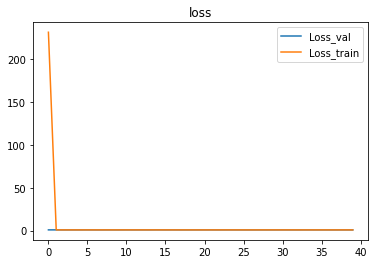

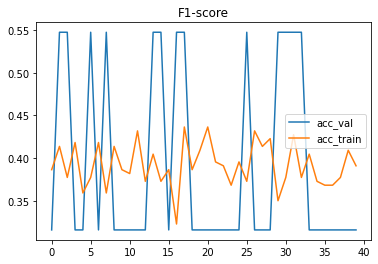

In [ ]:
import matplotlib.pyplot as plt


loss_curve = history.history["loss"]
loss_val = history.history["val_loss"]
acc_curve = history.history["f1_metric"]
acc_val = history.history["val_f1_metric"]

plt.plot(loss_val,label="Loss_val")
plt.plot(loss_curve,label="Loss_train")
plt.legend()
plt.title("loss")
plt.show()

plt.plot(acc_val, label="acc_val" )
plt.plot(acc_curve, label="acc_train" )
plt.legend()
plt.title("F1-score")
plt.show()

Je représente ici le résultat de l'évolution de la fonction de perte (1e graph) et le F1-score (2e graph) sur 40 epoch. 
- Pour *la fonction de perte*, j'obtient une descente allant jusqu'à proche de 0 et qui n'est pratiquement plus modifié pas au fil de l'entraînement. J'ai donc obtenu la valeur minimal de la fonction de perte à la fin de plusieurs entraînement, pour ce modèle.
- Pour *le F1-score*, j'obtient une oscillation du taux de prédiction pour les données de test, ayant pour résultat final environ **0.32** (soit 32%). Pour les données d'entraînement, la moyenne harmonique des prédictions du modèle est d'environ **0.46** (soit 46%).

# 6/ CONCLUSION

D'après les résultats du modèle, nous avons **un score de prédiction très faible** par rapport à ce qui est demandé. 
Le modèle n'est pas capable de distinguer un commentaire, s'il est favorable, défavorable ou neutre au projet, car les résultats de prédiction sont très proches des valeurs aléatoires. 

Afin d'améliorer les performances du modèle, il faudra effectuer plusieurs choses : 
- **Augmenter le nombre de commentaires** : il sera intéressant d'augmenter le nombre de commentaires qui ont déjà été classifiés. Ayant des commentaires très différents (car la langue française est complèxe), le modèle n'est pas capable de repérer des mots-clés qui catégorisent spécifiquement l'avis sur l'enquête. 
- **Effectuer plus d'étape de préprocessing** : Par exemple, en diminuant le nombre de mots dans chaque commentaire qui n'apporte pas d'influence sur le choix de l'avis. On diminue le nombre de mots pour tous les commentaires et on ressort les mots-clés qui sont importants à la catégorisation. (par exemple "Je suis favorable"). Les mots comme "Nantes", "ponts"... peuvent être utilisés dans un commentaire qui est favorable comme défavorable au projet, ce qui peut embrouiller l'apprentissage du modèle. 

Je pense que pour confirmer si nous pouvons automatiser l'avis d'un commentaire en utilisant des modèles d'IA, je devrais d'abord observer ce qui se passe en augmentant le nombre de commentaires catégorisés. Je pourrais ensuite faire plus d'étape de préprocessing et tester de nouveau mon modèle. J'aurais ainsi plus de résultats.